<ipython-input-7-edd1c733a93f>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')


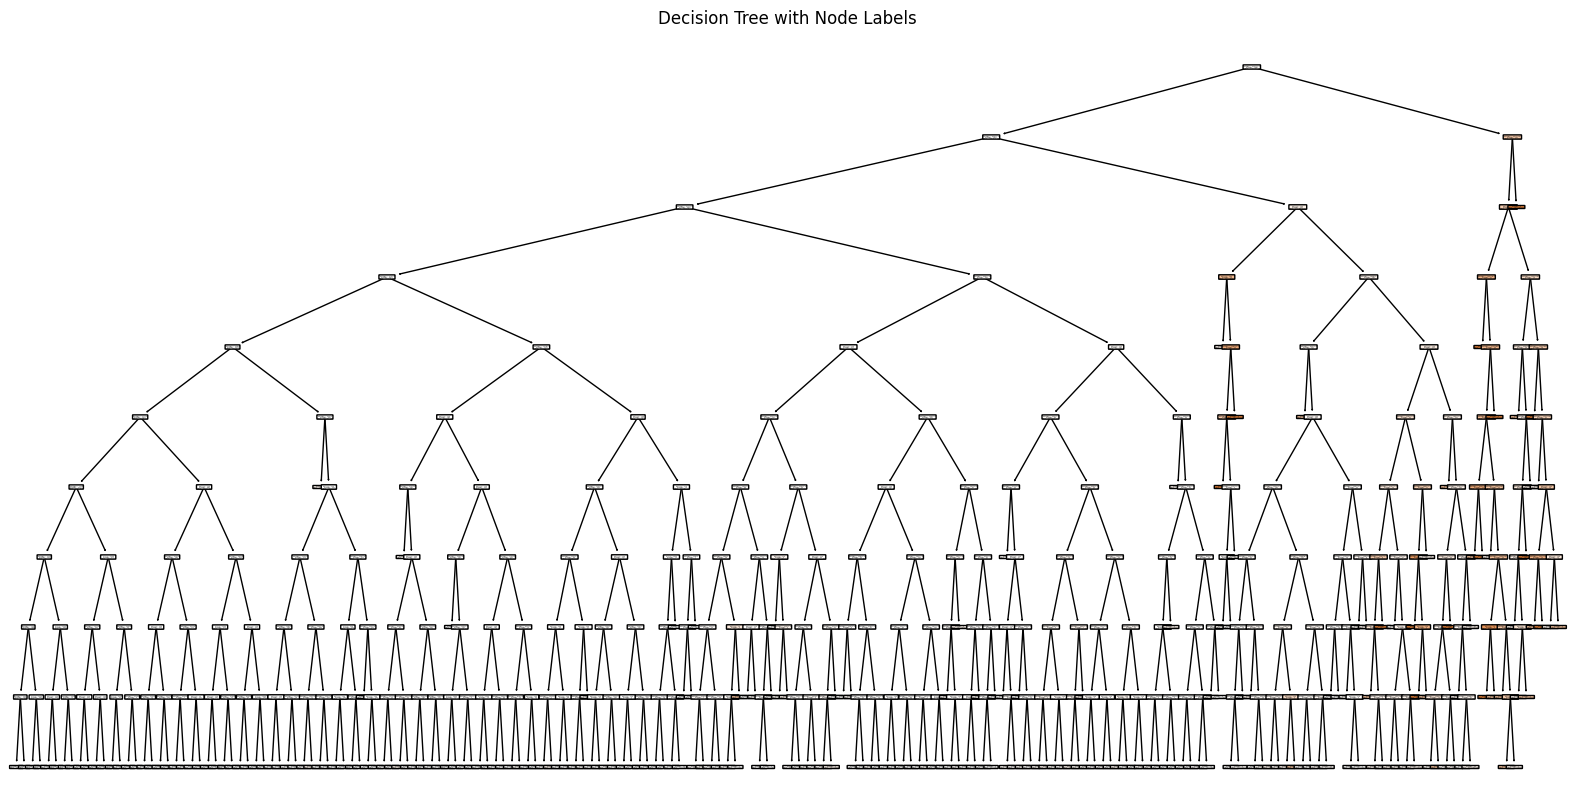

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

df = pd.read_csv('googleplaystore.csv')  # Load your dataset

# Clean 'Price' column: Remove non-numeric characters ('$') and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x), errors='coerce')

# Clean 'Installs' column: Remove non-numeric characters and convert to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with NaN values in any column
df.dropna(inplace=True)

# Define features and target variable
X = df[['Rating', 'Reviews', 'Price']]
y = df['Installs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=10)

# Train the Decision Tree Regressor
tree_regressor.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, feature_names=X.columns, filled=True, rounded=True, impurity=False, class_names=True)
plt.title("Decision Tree with Node Labels")
plt.show()

<ipython-input-3-8198de4da23f>:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')


Rating: 0.15286838062184827
Reviews: 0.8471282235104574
Price: 3.39586769439902e-06


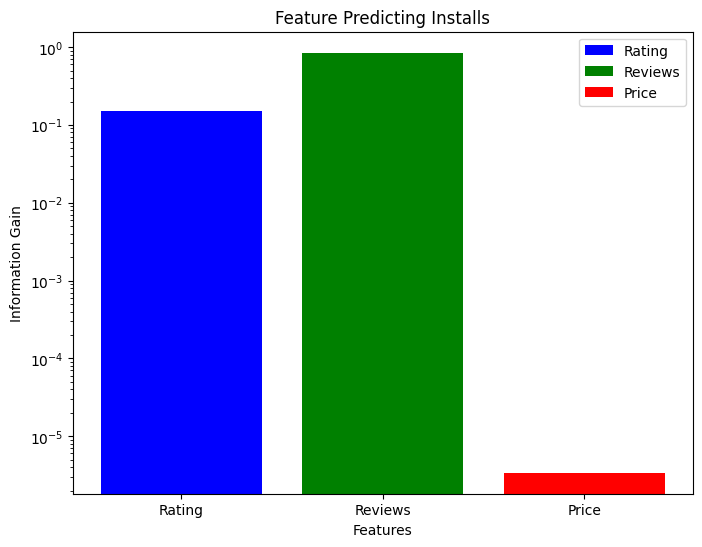

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('googleplaystore.csv')  # Load your dataset

# Clean 'Price' column: Remove non-numeric characters ('$') and convert to numeric
df['Price'] = pd.to_numeric(df['Price'].apply(lambda x: x.replace('$', '') if '$' in x else x), errors='coerce')

# Clean 'Installs' column: Remove non-numeric characters and convert to numeric
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').str.replace('Free', '0')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Drop rows with NaN values in any column
df.dropna(inplace=True)

# Split the dataset into features (X) and target (y)
X = df[['Rating', 'Reviews', 'Price']]
y = df['Installs']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor with a maximum depth to control tree growth
tree_regressor = DecisionTreeRegressor(random_state=42, max_depth=10)  # You can adjust the max_depth

# Train the Decision Tree Regressor
tree_regressor.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = tree_regressor.feature_importances_

# Print feature names and their importances
for feature, importance in zip(X.columns, feature_importances):
    print(f"{feature}: {importance}")

# Define colors for each feature
colors = ['blue', 'green', 'red']

# Plotting the feature importances with adjusted y-axis scale, colors, and legend
plt.figure(figsize=(8, 6))
bars = plt.bar(X.columns, feature_importances, color=colors)
plt.title('Feature Predicting Installs')
plt.xlabel('Features')
plt.ylabel('Information Gain')
plt.yscale('log')  # Using logarithmic scale for better visualization of smaller values

# Create a legend
plt.legend(bars, X.columns)

plt.show()